# Titanic Survival Prediction Project

This project explores the Titanic disaster dataset to predict whether a passenger survived based on key features like age, gender, class, fare, and family connections. It is one of the most popular beginner machine learning problems, originally published as a competition on Kaggle.

---

## Objective

Build and evaluate classification models that predict the **Survival** of a Titanic passenger using historical data. The final goal is to use various algorithms — including **Logistic Regression**, **Decision Trees**, **Random Forests**, **XGBoost**, and **Neural Networks** — to learn patterns and improve accuracy.

---

## Dataset Overview

The dataset consists of passenger information with the following relevant features (after preprocessing):

- `Pclass`: Passenger class (1st, 2nd, 3rd)
- `Sex`: Gender (converted to binary)
- `Age`: Passenger age (scaled and cleaned)
- `SibSp`, `Parch`: Number of siblings/spouses & parents/children aboard
- `Fare`: Ticket fare (normalized)
- `Embarked`: Port of embarkation (one-hot encoded)
- `Title`: Extracted from name (Mr, Miss, etc.)
- `FamilySize`: Combined from `SibSp` + `Parch` + 1
- `IsAlone`: Binary indicator of passengers traveling alone
- `Survived`: Target variable (0 = No, 1 = Yes)

---

## Techniques Used

### Data Preprocessing
- Missing value imputation (Age, Embarked)
- Feature engineering (`Title`, `FamilySize`, `IsAlone`)
- One-hot encoding of categorical variables
- Normalization and standardization of numerical values

### Models Implemented
- ✅ Logistic Regression (from scratch and with NumPy)
- ✅ Decision Trees (custom-built using Gini Impurity and Information Gain)
- ✅ Neural Networks (using TensorFlow/Keras)

### Evaluation Metrics
- Accuracy, Precision, Recall, F1 Score
- Confusion Matrix
- Visualizations of performance metrics over time

---

## Results & Insights

- **Gender and Class** were highly correlated with survival. Females and first-class passengers had a much higher survival rate.
- Feature engineering (like `Title` and `IsAlone`) improved model performance.
- Ensemble methods and deep learning offered improved accuracy over single-model approaches.

---

## Learning Goals

- Practice full ML pipeline: cleaning, preprocessing, modeling, and evaluation
- Learn the math and code behind ML models from scratch
- Apply evaluation metrics to understand model behavior
- Use TensorFlow for production-level deep learning modeling

---

## Tools & Libraries

- Python (NumPy, Pandas, Matplotlib)
- TensorFlow / Keras (for deep learning)
- Scikit-learn (for metric evaluation)
- Google Colab (for running notebooks)

---

## Final Thoughts

This project is an excellent foundation for learning applied machine learning — with the added bonus of implementing models from the ground up. It highlights the importance of preprocessing, engineering, and evaluation in building effective predictive models.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
data = pd.read_csv('TitanicDataset.csv')
df = pd.read_csv('TitanicDataset.csv')

## 1. Analyze the Dataset, do some EDA

 - We start off by Analyzing the dataset, Checking Null Values, Columns and udnerstanding a high level view of what the dataset is telling us

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Univariate Analysis

 - The examination of only 1 variable at a time

#### Plotting Age, Fare and Sex distribution

 - This helps us understand the data further, especially ther quantity we are working with in different regions

 - We can see Age is Distributed mostly towards the From 20 to 40 year olds

 - Most people are also on the cheaper fare and the lower class cabin

 - We can also see many more Men were on the titanic than women

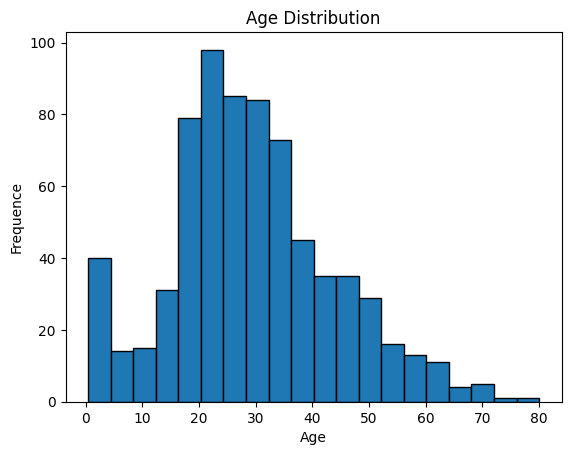

In [7]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

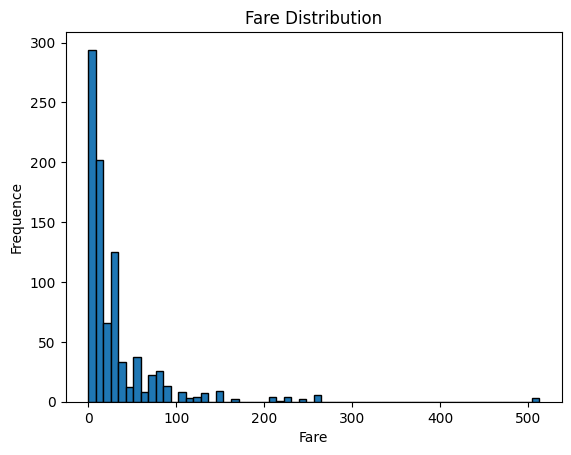

In [8]:
plt.hist(df['Fare'].dropna(), bins=60, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequence')
plt.show()

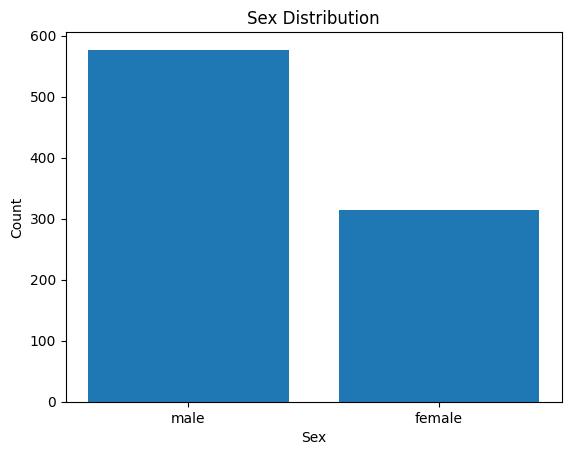

In [9]:
sex_counts  = df['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

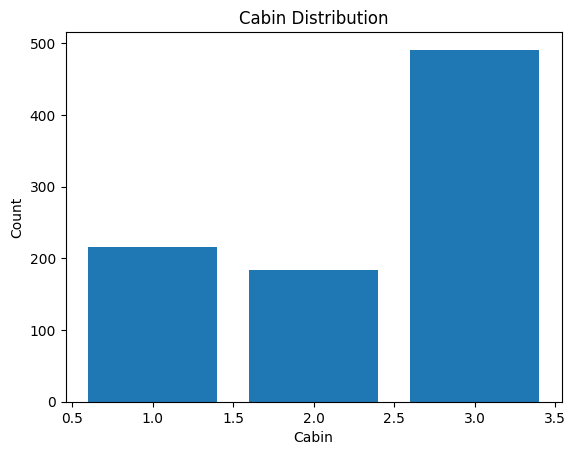

In [10]:
cabin_counts = df['Pclass'].value_counts()
plt.bar(cabin_counts.index, cabin_counts.values)
plt.title('Cabin Distribution')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()



### Bivariate Analysis

 - Looking at 2 Variables

#### Plotting Survival Rate by Gender, Age and Pclass

 - This shows how Survival rate is affected by Gender, Age and Pclass

 - From looking at the Survival rate we can see much more women survived then Men, An affecting part may be the amount so we may need to adjust for that

 - Class was also interesting, with the highest class surviving the most

 - Age also affected with Babies and Old people having the worst survival rate, potentially due to their abilities to survive in cold tempuratures

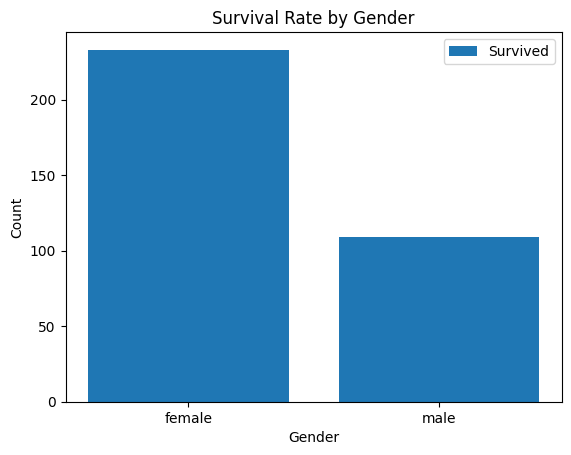

In [11]:
survived_gender = df[df['Survived'] == 1]['Sex'].value_counts()
not_survived_gender = df[df['Survived'] == 0]['Sex'].value_counts()

labels = survived_gender.index
x = range(len(labels))

plt.bar(x, survived_gender.values, label='Survived')
# plt.bar(x, not_survived_gender.values, label='Not Survived')
plt.xticks(x, labels)
plt.legend()
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



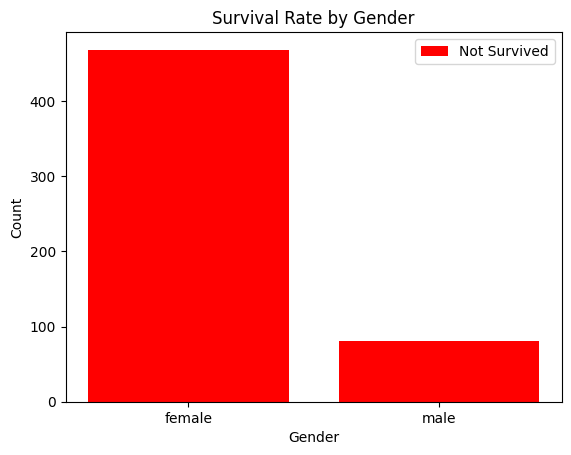

In [12]:
plt.bar(x, not_survived_gender.values, label='Not Survived', color='red')
plt.xticks(x, labels)
plt.legend()
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
Total_Percentage_Survived_female = (survived_gender.female) / (survived_gender.female + not_survived_gender.female)
Total_Percentage_Survived_male = (survived_gender.male) / (survived_gender.male + not_survived_gender.male)

Total Percentage Survived Female: 74.20 %
Total Percentage Survived Male: 18.89 %


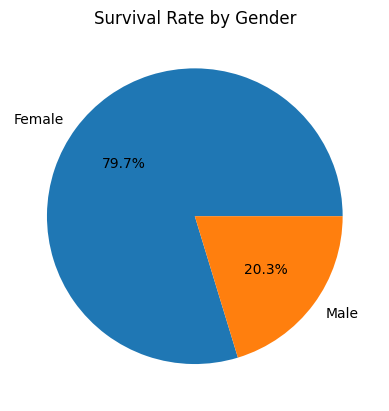

In [14]:
print(f'Total Percentage Survived Female: {Total_Percentage_Survived_female * 100:.2f} %')
print(f'Total Percentage Survived Male: {Total_Percentage_Survived_male * 100:.2f} %')

plt.pie([Total_Percentage_Survived_female, Total_Percentage_Survived_male], labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Survival Rate by Gender')
plt.show()

 - As you can see much more Females Survived than Males

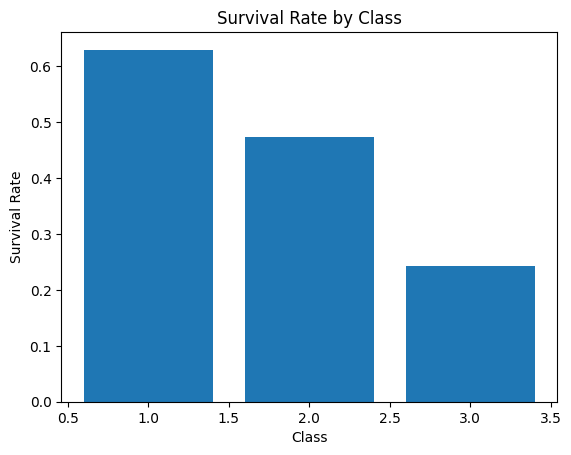

In [15]:
classes = sorted(df['Pclass'].unique())
survival_rate = [df[df['Pclass'] == p]['Survived'].mean() for p in classes]

plt.bar(classes, survival_rate)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

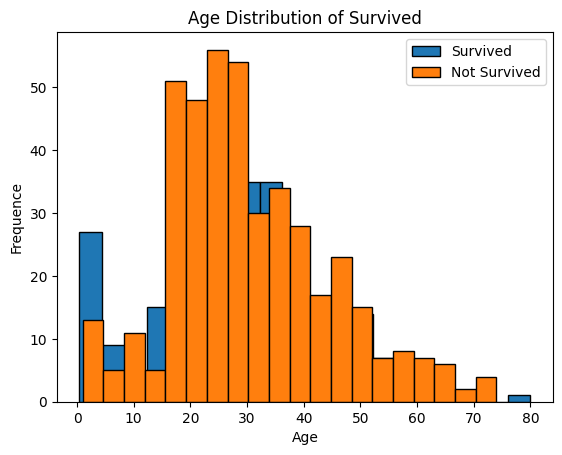

In [16]:
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, edgecolor='black', label="Survived")
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, edgecolor='black', label="Not Survived")
plt.legend()
plt.title('Age Distribution of Survived')
plt.xlabel('Age')
plt.ylabel('Frequence')

plt.show()

### MultiVariate Analysis

 - Looking at Multiple Variables

#### Survival by Gender and Pclass

 - Shows us how 2 variables can be linked to survival

 - We can clearly see that Women survived more than men especially the women in hgiher classes. potentially hgiher social classes

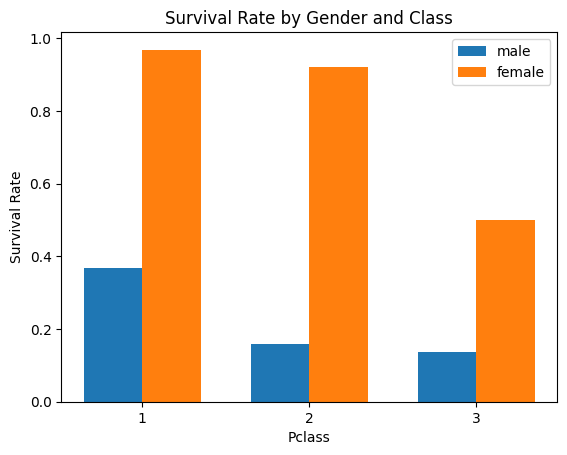

In [17]:
classes = sorted(df['Pclass'].unique())
genders = ['male', 'female']
width = 0.35 # Width of Each Bar
x = range(len(classes))

# Loop Through Each gender and Plot the Bar
for i, gender in enumerate(genders):
  # Find the Survival Rate, Gender and Pclass specific
    survival_rate = [
        df[(df['Sex'] == gender) & (df['Pclass'] == p)]['Survived'].mean()
        for p in classes
    ]
    offset = width * i
    plt.bar([xi + offset for xi in x], survival_rate, width=width, label=gender)

plt.xticks([xi + width / 2 for xi in x], classes)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Class')
plt.legend()
plt.show()

## 2. Data Preprocessing

  - We need to preprocess the data to clean the dataset to maximise efficiency and productive output of the model

In [18]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 - Age is a Very important feature hence we will remove rows where age is null
 - For Embarked only 2 is null hence we will fill it in with the most common result
 - We will Drop Cabin as there are many missing values

In [19]:
df = df[df['Age'].notnull()]

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-21-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [22]:
df.drop(columns=['Cabin'], inplace=True)

In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### 2. Now We convert Categorical Variables

 - Using One hot Coding for Sex, Embarked and Pclass

 - Using Label Encoding Aswell

 - This helps the model as they require numerical input

In [24]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [26]:
# Can be done using Label Encoding

# df['Sex'] = df['Sex'].map({'male': 0, 'female' : 1})

### 3. Drop Irrelavant Columns that directly dont help the model

In [27]:
df.drop(columns=['Ticket', 'PassengerId'], inplace=True)

### 4. Create New Features -> Feature Engineering

  - The process of using previous data to create new insights, new features

 - Family Count is number of people in the Family
 - Is Alone is if they have no family on

 - The coolest one is Title Extraction
 where we check if they ahve Mrs, Miss, Mr, Master or others

In [28]:
df['Family_count'] = df['SibSp'] + df['Parch'] + 1
df['isAlone'] = (df['Family_count'] == 1).astype(int)

In [29]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [30]:
df['Title'].value_counts()

## Most are Mr Miss Mrs and Master, Lets consoildate the Others so that we can reduce overfitting

,count
Title,
Mr,398
Miss,146
Mrs,108
Master,36
Rev,6
Dr,6
Col,2
Mlle,2
Major,2


In [31]:
# Replace MLLe and MS with Miss and Mme with Mrs as this is the French Translation
df['Title'] = df['Title'].replace(['MLLe', 'Ms'], "Miss").replace(['Mme'], 'Mrs')

In [32]:
# Calls it Rare if it is not in the 4 most common preventing overfitting and allowing for better generalisation
df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Rare')

In [33]:
df['Title'].value_counts()

,count
Title,
Mr,398
Miss,147
Mrs,109
Master,36
Rare,24


In [34]:
# Now Perform One Hot Encoding

df = pd.get_dummies(df, columns=['Title'], drop_first=True)

In [35]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Family_count', 'isAlone',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

### 5. Scale Numeric Features

 - Can be useful as if one feature has a larger range or variance than other then it can dominate the learning process even if it is not more important

 - Numeric Features such as Age, Fare and Family Size can be scaled to further help the model

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare', 'Family_count']] = scaler.fit_transform(df[['Age', 'Fare', 'Family_count']])

In [37]:
df['Age']

,Age
0,-0.530377
1,0.571831
2,-0.254825
3,0.365167
4,0.365167
...,...
885,0.640719
886,-0.185937
887,-0.737041
889,-0.254825


## 3. Now Lets Build Models to Predict

### Logistic Regression - From Scratch

 - Very Similar to Linear Regression However we have a Sigmoid Function to provide us with the category, called Y_hat

 $$\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad \text{where} \quad z = w^T x + b$$

 Where:
 - $$\hat{y}$$ is the predicted probability
 - w is the weights vector
 - b is the bias
 - x is the input vector

 #### Loss Function -> Binary Cross Entropy Loss

 $$\mathcal{L} = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$$

  - y is the actual label, Y hat is the prediceted probability
  - This loss function punishes when Y hat ( the prediction between 0 and 1 ) is different to Y and more severly when the difference is large

#### Gradient Descent Updates

  - Change the Weights with a Learning rate Alpha

 $$w = w - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w}, \quad
b = b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}$$

In [38]:
y = df['Survived'].values.reshape(-1,1)


In [39]:
# Now lets define the Functions Needed

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_hat):
  epsilon = 1e-10 # Small value to rpevent log 0
  return -np.mean((y_true * np.log(y_hat + epsilon)) + ((1-y_true)*(np.log(1-y_hat))))

In [42]:
## Now we Initialise the Weights

# Extract number of features and then assign a Column vector for the weights
X = df.drop(columns=['Survived', 'Name']).values

X = X.astype(float)
n_features = X.shape[1]
weights = np.zeros((n_features, 1))
bias = np.array(0.0)
# Hyperparameters
learning_rate = 0.0001
epochs = 1000000
losses = []
val_losses = []


In [44]:
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

for epoch in range(epochs) :

  z = np.dot(X_train, weights) + bias
  y_hat = sigmoid(z)

  v_z = np.dot(X_test, weights) + bias
  y_hat_val = sigmoid(v_z)

  loss = compute_loss(y_train, y_hat)
  losses.append(loss)

  # === Compute validation loss
  val_loss = compute_loss(y_test, y_hat_val)
  val_losses.append(val_loss)

  dw = np.dot(X_train.T, (y_hat - y_train)) / y_train.shape[0]
  db = np.mean(y_hat-y_train)

  weights -= learning_rate * dw
  bias -= learning_rate * db

  if epoch % 100000 == 0:
    print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 0.6931471804779838
Epoch: 100000, Loss: 0.5055860573906954
Epoch: 200000, Loss: 0.4793151635954774
Epoch: 300000, Loss: 0.46852162213979376
Epoch: 400000, Loss: 0.46204032176242393
Epoch: 500000, Loss: 0.4574131236020406
Epoch: 600000, Loss: 0.45384934120471826
Epoch: 700000, Loss: 0.4510040437425883
Epoch: 800000, Loss: 0.44868705488439975
Epoch: 900000, Loss: 0.4467758818414807


In [45]:
## Now lets do some Predictions

def predict(X, weights, bias, threshold=0.5):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= threshold).astype(int)

y_pred = predict(X_test, weights, bias)
y_pred_train = predict(X_train, weights, bias)

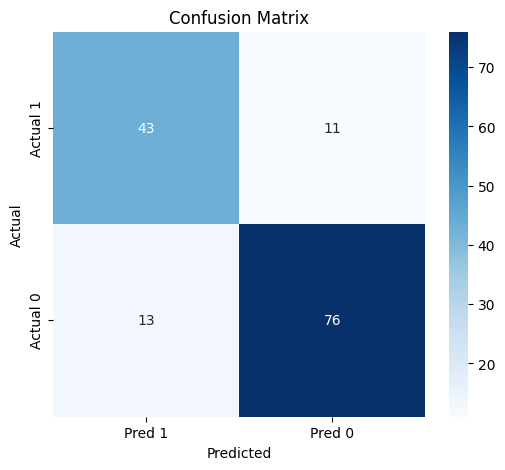

In [46]:
# Lets no Calculate the Metrics, Accuracy, Precision, Recall etc

def evaluate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

    return accuracy, precision, recall, f1, TP, TN, FP, FN
acc, prec, rec, f1, TP, TN, FP, FN = evaluate_metrics(y_test, y_pred)
acc_t, prec_t, rec_t, f1_t, TP_t, TN_t, FP_t, FN_t = evaluate_metrics(y_train, y_pred_train)

# An Lets Plot it

import seaborn as sns

conf_matrix = np.array([[TP, FP],
                        [FN, TN]])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 1", "Pred 0"], yticklabels=["Actual 1", "Actual 0"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

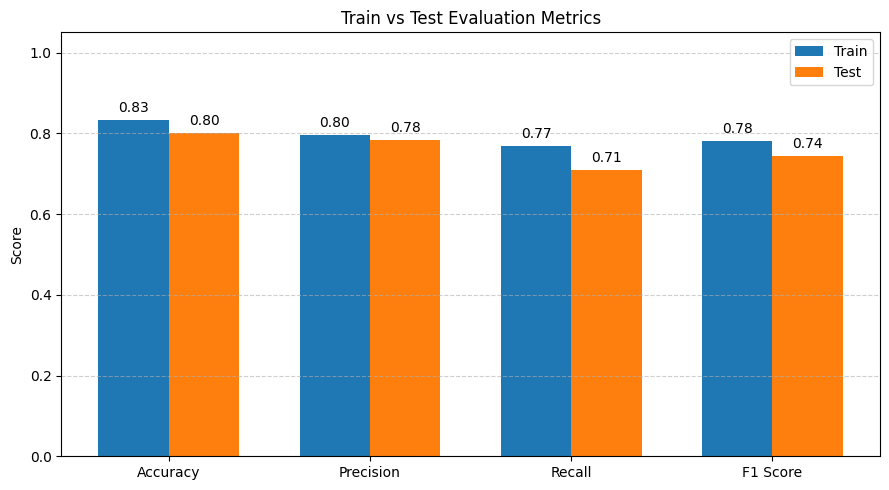

In [48]:
# Also a Bar Chart

metrics = [acc, prec, rec, f1]
metric_test = [acc_t, prec_t, rec_t, f1_t]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# X positions for each label
x = np.arange(len(labels))  # [0, 1, 2, 3]
bar_width = 0.35

plt.figure(figsize=(9, 5))

# Plot training metrics
plt.bar(x - bar_width/2, metrics, width=bar_width, label='Train')

# Plot test metrics
plt.bar(x + bar_width/2, metric_test, width=bar_width, label='Test')

# Add text above bars
for i in range(len(labels)):
    plt.text(x[i] - bar_width/2, metrics[i] + 0.02, f"{metrics[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width/2, metric_test[i] + 0.02, f"{metric_test[i]:.2f}", ha='center')

# Labels & legend
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Train vs Test Evaluation Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

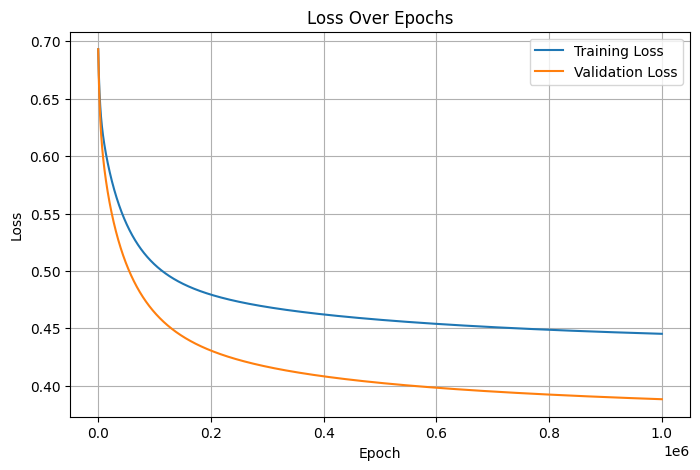

In [52]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Training Loss')
if val_losses:
    plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()



## Shows good Metrics in Test Dataset Showing no Underfitting and Good prediction

  - The model achieve an overall accuracy of 82%, whcih measn most predictions are correct

  - However the 70% in recall meaning that it is missing some true positives

  - The Small differences in Accuracy and Metrics between Train and Test show small amount of Underfitting

  - We can actually see that validation Loss is less than Training Loss

## Now lets do it using Decision Trees

#### Gini Impurity

 - Measures the probability of incorrectly classifying a randomly chosen element if it was randomely labeled according to the distribution of labels in the dataset

 $$Gini(D) = 1 - \sum_{i=1}^{n} p_i^2$$

 - Where P is the Proportion fo examples in the class hence linked to Purity, 0.5 is Extrmely Unpure and 1 is pure

#### Gini Split ( Weighted Gini Impurity )

 - Then splitting a dataset D into subsets we calculate the weighted average of the gini impurities of the subsets

 $$Gini_{split} = \sum_{j=1}^{k} \frac{|D_j|}{|D|} \cdot Gini(D_j)$$

 - The best split has the lowest Gini Split hence we do that

#### Information Gain (Entropy-based)

 - Entropy : $$Entropy(D) = - \sum_{i=1}^{n} p_i \log_2(p_i)$$

 - Entropy measures the impurity in a dataset, If a dataset has all same class then entropy is 0

 - Information Gain : $$IG(D, A) = Entropy(D) - \sum_{j=1}^{k} \frac{|D_j|}{|D|} \cdot Entropy(D_j)
 $$

 - Information gain tells us how much entropy is reduced after a dataset is split on an attribute

 - The more we reduce uncertainty the more information we gain

In [51]:
# Gini Impurity

def gini(y):
  ## Finds unique class labels in y and counts how many times it occurs
  classes, counts = np.unique(y, return_counts=True)

  ## Finds the probabilities, if it is close to ! then 1 class will dominate
  p = counts / len(y)

  ## Lower Gini means a purer dataset
  return 1 - np.sum(p**2)

In [52]:
def gini_split(X, y, feature_index, threshold):

  ## Selects all the rows where the feature value is less than or requal to the threshold
  left_mask = X[:, feature_index] <= threshold

  ## Right mask is the Logical Not of Left Mask -> The Remaining Data
  rightmask = ~left_mask

  # Splits both X features and y labels into left and right subsets
  return X[left_mask], y[left_mask], X[rightmask], y[rightmask]

In [61]:
def information_gain(y, y_left, y_right):

  # Checks for empty Splits
  if len(y_left) == 0 or len(y_right) == 0:
    return 0

  # Proportion of Samples in the Left Subset, (1-p) is in the right subset
  p = len(y_left) / len(y)

  # Returns the Gini of parent minus the Weighted Gini of child nodes after the split
  return gini(y) - (p * gini(y_left) + (1-p) * gini(y_right))

In [78]:
class DecisionTree:

  ## Initialises a Decision Tree Object
  def __init__(self, max_depth=10, min_samples_split=2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = None

  ## Defines the Structure of a Tree Node
  class Node:
    def __init__(self, depth=0):
      self.depth = depth
      # Which feature it splits on
      self.feature_index = None
      # The value it splits on
      self.threshold = None
      self.left = None
      self.right = None
      # If it is a Leaf
      self.predicted_class = None

  def fit(self, X, y):
    # Grows the Tree from the Root
    self.root = self._grow_tree(X, y, depth=0)

  def _grow_tree(self, X, y, depth):
    # First Create a Node
    node = self.Node(depth)

    # Check For stopping conditions
    # All the labels are the same then it is a leaf node, a Pure node
    if len(np.unique(y)) == 1:
      node.predicted_class = y[0] if np.isscalar(y[0]) else y[0].item()
      return node
    # This prevents Overfitting Stop if the Depth is too big or there is too few samples and predict the class with majority
    if depth >= self.max_depth or len(y) < self.min_samples_split:
      node.predicted_class = round(np.mean(y.ravel()))
      return node

    # To find the Best split lets start with the worst possible Gain -1
    best_gain = -1
    best_idx, best_thresh = None, None

    # Try every unique value in every feature as a split point
    # Use ginig-based information gain to evaluate and keep track of the best split
    for i in range(X.shape[1]):
      # Evalusates every possible decision bounder for feature i, and Unqiue means we dont test the same twice
      thresholds = np.unique(X[:,i])

      # For every Unique value of feature i, us eit as a split point so we can find the best one ( Brute Force)
      for thresh in thresholds :
        # Trying each threshold fto see which s[plits reduce impurity
        X_left, y_left, X_right, y_right = gini_split(X,y,i,thresh)
        gain = information_gain(y, y_left, y_right)
        if gain > best_gain:
          best_gain = gain
          best_idx = i
          best_thresh = thresh
          best_splits = (X_left, y_left, X_right, y_right)

    # Handle No usefeul Split, treat it as a leaf
    if best_gain ==-1 :
      node.predicted_class = round(np.mean(y.ravel()))
      return node

    # Assign best split and recurse
    node.feature_index = best_idx
    node.threshold = best_thresh
    node.left = self._grow_tree(best_splits[0], best_splits[1], depth+1)
    node.right = self._grow_tree(best_splits[2], best_splits[3], depth+1)
    return node

  def _predict_one(self, x, node):
    # This means it is a Leaf
    if node.predicted_class is not None:
      return node.predicted_class

    # Traverse the Tree based on the Input
    if x[node.feature_index] <= node.threshold:
      return self._predict_one(x, node.left)
    else:
      return self._predict_one(x, node.right)

  def predict(self, X):
    return np.array([self._predict_one(x, self.root) for x in X], dtype=np.float64)



In [79]:
## Training

tree = DecisionTree(max_depth=10, min_samples_split=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [80]:
# === EVALUATE ===
def evaluate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    return accuracy, precision, recall, f1, TP, TN, FP, FN

acc, prec, rec, f1, TP, TN, FP, FN = evaluate_metrics(y_test, y_pred)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")
print(f"Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")

Accuracy : 74.643
Precision: 0.392
Recall   : 0.399
F1 Score : 0.395
Confusion Matrix:
TP: 3192, FP: 4959
FN: 4816, TN: 7482


In [82]:
import matplotlib.pyplot as plt

# === REUSABLE EVALUATION FUNCTION ===
def evaluate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    return accuracy, precision, recall, f1

# === GET TRAIN/TEST PREDICTIONS ===
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

# === CALCULATE METRICS ===
acc_train, prec_train, rec_train, f1_train = evaluate_metrics(y_train, y_pred_train)
acc_test, prec_test, rec_test, f1_test = evaluate_metrics(y_test, y_pred_test)

# === ORGANIZE FOR PLOTTING ===
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [acc_train, prec_train, rec_train, f1_train]
test_scores = [acc_test, prec_test, rec_test, f1_test]

# === PLOT ===
x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(12, 6))  # Was 10, now 12
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, test_scores, width, label='Test')

plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Performance Metrics (Train vs Test)')
plt.xticks(x, metrics_names)
plt.legend()

for i in range(len(metrics_names)):
    plt.text(i - 0.4, train_scores[i] + 0.02, f"{train_scores[i]:.2f}")
    plt.text(i + 0.05, test_scores[i] + 0.02, f"{test_scores[i]:.2f}")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Shows Minimal Overfitting Again between Datasets

## Now we will Implement it using a Nueral Network

In [83]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
X=df.drop(columns=['Survived', 'Name'])
y = df['Survived']

In [103]:
# Split into Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().astype(np.float32)
y_train = y_train.to_numpy().astype(np.float32)
X_test = X_test.to_numpy().astype(np.float32)
y_test = y_test.to_numpy().astype(np.float32)


In [104]:
X_train.shape

(571, 14)

In [110]:
# Design and construct the model

# Create the Model, Input Layer 2 Hidden Layers with 16 then 8 nodes then 1 output node with sigmoid output
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [111]:
# Compile and Train the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision, tf.keras.metrics.Recall])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3434 - loss: 0.7407 - precision: 0.2834 - recall: 0.3934 - val_accuracy: 0.6014 - val_loss: 0.7171 - val_precision: 0.4839 - val_recall: 0.2679
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6505 - loss: 0.6805 - precision: 0.6333 - recall: 0.3173 - val_accuracy: 0.6503 - val_loss: 0.6752 - val_precision: 0.5938 - val_recall: 0.3393
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6674 - loss: 0.6502 - precision: 0.7320 - recall: 0.3343 - val_accuracy: 0.7343 - val_loss: 0.6440 - val_precision: 0.7143 - val_recall: 0.5357
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7553 - loss: 0.6042 - precision: 0.7555 - recall: 0.5301 - val_accuracy: 0.7413 - val_loss: 0.6138 - val_precision: 0.7021 - val_recall: 0.5893
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7492 - loss: 0.5855 - precision: 0.7496 - recall: 0.6235 - val_accuracy: 0.7343 - val_loss: 0.5912 - va

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8154 - loss: 0.4320 - precision: 0.7920 - recall: 0.7441

Test Metrics:
Accuracy : 0.825
Precision: 0.816
Recall   : 0.714
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        87
         1.0       0.82      0.71      0.76        56

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143

Confusion Matrix:
[[78  9]
 [16 40]]


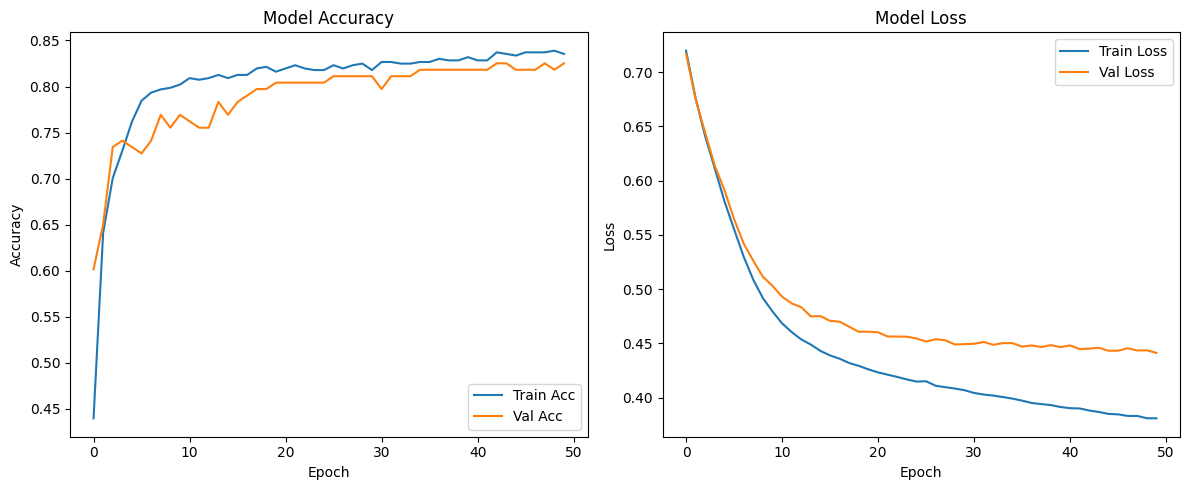

In [112]:
# === Evaluate on test set ===
test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test)
print("\nTest Metrics:")
print(f"Accuracy : {test_acc:.3f}")
print(f"Precision: {test_prec:.3f}")
print(f"Recall   : {test_rec:.3f}")

# === Predictions and Report ===
y_pred = (model.predict(X_test) >= 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Plot Accuracy and Loss ===
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()